In [44]:
#load libraroies
import pandas as pd # to read/manipulate/write data from files
import numpy as np # to manipulate data/generate random numbers
import plotly.express as px # interactive visualizations
import seaborn as sns # static visualizations
import matplotlib.pyplot as plt # fine tune control over visualizations

from pathlib import Path # represent and interact with directories/folders in the operating system
from collections import namedtuple # structure data in an easy to consume way

import requests # retrieve data from an online source

In [45]:
# save directory we downloaded the ABCD data to `data_path`
data_path = Path("/home/jovyan/ABCD3")
# glob (match) all text files in the `data_path` directory
files = sorted(data_path.glob("*.txt"))

In [46]:
# We store the info in 4 different Python datatypes
data_elements = []
data_structures = {}
event_names = set()
StructureInfo = namedtuple("StructureInfo", field_names=["description", "eventnames"])

for text_file in files:
    # Extract data structure from filename
    data_structure = Path(text_file).name.split('.txt')[0]
    
    # Read the data structure and capture all the elements from the file
    # Note this could have been done using the data returned from the NDA API
    # We are using pandas to read both the first and second rows of the file as the header
    # Note: by convention dataframe variables contain `df` in the name.
    data_structure_df = pd.read_table(text_file, header=[0, 1], nrows=0)
    for data_element, metadata in data_structure_df.columns.values.tolist():
        data_elements.append([data_element, metadata, data_structure])
        
# Convert to a Pandas dataframe
data_elements_df = pd.DataFrame(data_elements, columns=["element", "description", "structure"])

In [47]:
#check structure
data_elements_df.head()

element                                        description  \
0    collection_id                                      collection_id   
1  abcd_abcls01_id                                    abcd_abcls01_id   
2       dataset_id                                         dataset_id   
3       subjectkey  The NDAR Global Unique Identifier (GUID) for r...   
4   src_subject_id         Subject ID how it's defined in lab/project   

      structure  
0  abcd_abcls01  
1  abcd_abcls01  
2  abcd_abcls01  
3  abcd_abcls01  
4  abcd_abcls01

In [48]:
#save as a tsv
data_elements_df.to_csv("data_elements.tsv", sep="\t", index=None)

In [49]:
data_elements_df.shape

(75221, 3)

In [50]:
len(data_structures)

0

In [51]:
event_names

set()

In [52]:
data_elements_df.element.unique().shape

(72013,)

In [53]:
data_elements_df.query("element == 'smri_vol_scs_amygdalalh'")

element                               description  \
30612  smri_vol_scs_amygdalalh  Volume in mm^3 of ASEG ROI left-amygdala   

           structure  
30612  abcd_smrip201

In [54]:
structure = 'abcd_mri01'  # 'abcd_psb01'
example_structure_df = pd.read_table(data_path / f"{structure}.txt", header=[0, 1], nrows=0)
example_structure_df.columns.tolist()

[('collection_id', 'collection_id'),
 ('abcd_mri01_id', 'abcd_mri01_id'),
 ('dataset_id', 'dataset_id'),
 ('subjectkey',
  'The NDAR Global Unique Identifier (GUID) for research subject'),
 ('src_subject_id', "Subject ID how it's defined in lab/project"),
 ('interview_date',
  'Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY'),
 ('interview_age',
  'Age in months at the time of the interview/test/sampling/imaging.'),
 ('sex', 'Sex of the subject'),
 ('eventname', 'The event name for which the data was collected'),
 ('mri_info_visitid', 'Visit name'),
 ('mri_info_manufacturer', 'Imaging device manufacturer'),
 ('mri_info_manufacturersmn', "Imaging device manufacturer's model name"),
 ('mri_info_deviceserialnumber',
  'Hashed version of imaging device serial number'),
 ('mri_info_magneticfieldstrength',
  'Magnetic field strength of imaging device in teslas'),
 ('mri_info_softwareversion', 'Imaging device software version'),
 ('mri_info_stu

In [55]:
#find structures with baseline data
NOEVENTS = {}
for data_structure, info in data_structures.items():
    if info.eventnames:
        if 'baseline_year_1_arm_1' in info.eventnames:
            print(f"{data_structure}: {info.description}")
    else:
        NOEVENTS[data_structure] = info

In [56]:
for data_structure, info in NOEVENTS.items():
    print(f"{data_structure}: {info.description}")

In [57]:
common = ["subjectkey", "interview_date", "interview_age", "eventname", "sex"]
demographic = ["site_id_l", "anthroheightcalc", "anthroweightcalc", "ehi_y_ss_scoreb", 'neighborhood_crime_y']
clinical = ['physical_activity2_y', 'screentime_wkdy_typical_hr', 'ksads_21_134_p', 'cbcl_scr_07_stress_t', 'cbcl_scr_syn_anxdep_t']
behavioral = ['nihtbx_cardsort_agecorrected', 'nihtbx_flanker_agecorrected', 'nihtbx_list_agecorrected', 'nihtbx_picvocab_agecorrected', 'nihtbx_totalcomp_agecorrected']
imaging = ['mri_info_manufacturer', 'rsfmri_c_ngd_vta_ngd_sa', 'rsfmri_c_ngd_dla_ngd_sa', 'rsfmri_c_ngd_sa_ngd_dt','rsfmri_c_ngd_sa_ngd_cgc']

data_elements_of_interest = demographic + clinical + behavioral + imaging

In [58]:
structures2read = {}
for element in data_elements_of_interest:
    item = data_elements_df.query(f"element == '{element}'").structure.values[0]
    if item not in structures2read:
        structures2read[item] = []
    structures2read[item].append(element)
structures2read

{'abcd_lt01': ['site_id_l'],
 'abcd_ant01': ['anthroheightcalc', 'anthroweightcalc'],
 'abcd_ehis01': ['ehi_y_ss_scoreb'],
 'abcd_nsc01': ['neighborhood_crime_y'],
 'abcd_yrb01': ['physical_activity2_y'],
 'abcd_stq01': ['screentime_wkdy_typical_hr'],
 'abcd_ksad01': ['ksads_21_134_p'],
 'abcd_cbcls01': ['cbcl_scr_07_stress_t', 'cbcl_scr_syn_anxdep_t'],
 'abcd_tbss01': ['nihtbx_cardsort_agecorrected',
  'nihtbx_flanker_agecorrected',
  'nihtbx_list_agecorrected',
  'nihtbx_picvocab_agecorrected',
  'nihtbx_totalcomp_agecorrected'],
 'abcd_mri01': ['mri_info_manufacturer'],
 'abcd_betnet02': ['rsfmri_c_ngd_vta_ngd_sa',
  'rsfmri_c_ngd_dla_ngd_sa',
  'rsfmri_c_ngd_sa_ngd_dt',
  'rsfmri_c_ngd_sa_ngd_cgc']}

In [59]:
# Read data from one structure
example_df = pd.read_table(data_path / f"{list(structures2read)[0]}.txt", skiprows=[1], low_memory=False,
                  usecols=common + structures2read[list(structures2read)[0]])
example_df.head()

subjectkey interview_date  interview_age sex  \
0  NDAR_INV007W6H7B     02/21/2017            126   M   
1  NDAR_INV00BD7VDC     04/24/2019            123   M   
2  NDAR_INV00CY2MDM     01/16/2018            135   M   
3  NDAR_INV00J52GPG     09/11/2019            122   M   
4  NDAR_INV00LH735Y     06/26/2019            126   M   

                  eventname site_id_l  
0     baseline_year_1_arm_1    site22  
1  1_year_follow_up_y_arm_1    site07  
2   6_month_follow_up_arm_1    site20  
3  1_year_follow_up_y_arm_1    site17  
4  18_month_follow_up_arm_1    site03

In [67]:
all_df = None
for structure, elements in structures2read.items():
    data_structure_filtered_df = pd.read_table(data_path / f"{structure}.txt", skiprows=[1], low_memory=False, usecols=common + elements)
    data_structure_filtered_df = data_structure_filtered_df.query("eventname == 'baseline_year_1_arm_1'")
    if all_df is None:
        all_df =  data_structure_filtered_df[["subjectkey", "interview_date", "interview_age", "sex"] + elements]
    else:
        all_df = all_df.merge( data_structure_filtered_df[['subjectkey'] + elements], how='outer')

In [68]:
all_df.head()

subjectkey interview_date  interview_age sex site_id_l  \
0  NDAR_INV007W6H7B     02/21/2017            126   M    site22   
1  NDAR_INV00LH735Y     01/29/2018            109   M    site03   
2  NDAR_INV014RTM1V     05/02/2017            115   M    site17   
3  NDAR_INV0182J779     06/25/2018            111   F    site06   
4  NDAR_INV01NAYMZH     08/09/2017            129   M    site16   

   anthroheightcalc  anthroweightcalc  ehi_y_ss_scoreb  neighborhood_crime_y  \
0             56.50              82.8                1                   4.0   
1             52.00              80.0                1                   5.0   
2             55.35              89.2                1                   5.0   
3             54.00              74.0                1                   5.0   
4             60.50              91.0                1                   5.0   

   physical_activity2_y  ...  nihtbx_cardsort_agecorrected  \
0                   1.0  ...                         103.0   
1                   7.0  ...                          81.0   
2                   5.0  ...                         100.0   
3                   1.0  ...                          90.0   
4                   1.0  ...                         103.0   

   nihtbx_flanker_agecorrected  nihtbx_list_agecorrected  \
0                         92.0                     107.0   
1                         88.0                      82.0   
2                         88.0                      89.0   
3                         88.0                     117.0   
4                         83.0                     107.0   

   nihtbx_picvocab_agecorrected  nihtbx_totalcomp_agecorrected  \
0                         122.0                          114.0   
1                          98.0                           79.0   
2                         142.0                          125.0   
3                         153.0                          125.0   
4                         153.0                          116.0   

     mri_info_manufacturer  rsfmri_c_ngd_vta_ngd_sa  rsfmri_c_ngd_dla_ngd_sa  \
0       GE MEDICAL SYSTEMS                 0.010642                -0.006031   
1                  SIEMENS                 0.070095                -0.014402   
2  Philips Medical Systems                      NaN                      NaN   
3                  SIEMENS                 0.317699                -0.231733   
4                  SIEMENS                 0.027299                -0.006801   

   rsfmri_c_ngd_sa_ngd_dt rsfmri_c_ngd_sa_ngd_cgc  
0               -0.003974                0.146978  
1                0.031217                0.165857  
2                     NaN                     NaN  
3                0.215719                0.237304  
4                0.092259                0.053189  

[5 rows x 24 columns]

In [74]:
all_df.shape, all_df.subjectkey.unique().shape

((11883, 24), (11878,))

In [73]:
all_df.head()

subjectkey interview_date  interview_age sex site_id_l  \
0  NDAR_INV007W6H7B     02/21/2017            126   M    site22   
1  NDAR_INV00LH735Y     01/29/2018            109   M    site03   
2  NDAR_INV014RTM1V     05/02/2017            115   M    site17   
3  NDAR_INV0182J779     06/25/2018            111   F    site06   
4  NDAR_INV01NAYMZH     08/09/2017            129   M    site16   

   anthroheightcalc  anthroweightcalc  ehi_y_ss_scoreb  neighborhood_crime_y  \
0             56.50              82.8                1                   4.0   
1             52.00              80.0                1                   5.0   
2             55.35              89.2                1                   5.0   
3             54.00              74.0                1                   5.0   
4             60.50              91.0                1                   5.0   

   physical_activity2_y  ...  nihtbx_cardsort_agecorrected  \
0                   1.0  ...                         103.0   
1                   7.0  ...                          81.0   
2                   5.0  ...                         100.0   
3                   1.0  ...                          90.0   
4                   1.0  ...                         103.0   

   nihtbx_flanker_agecorrected  nihtbx_list_agecorrected  \
0                         92.0                     107.0   
1                         88.0                      82.0   
2                         88.0                      89.0   
3                         88.0                     117.0   
4                         83.0                     107.0   

   nihtbx_picvocab_agecorrected  nihtbx_totalcomp_agecorrected  \
0                         122.0                          114.0   
1                          98.0                           79.0   
2                         142.0                          125.0   
3                         153.0                          125.0   
4                         153.0                          116.0   

     mri_info_manufacturer  rsfmri_c_ngd_vta_ngd_sa  rsfmri_c_ngd_dla_ngd_sa  \
0       GE MEDICAL SYSTEMS                 0.010642                -0.006031   
1                  SIEMENS                 0.070095                -0.014402   
2  Philips Medical Systems                      NaN                      NaN   
3                  SIEMENS                 0.317699                -0.231733   
4                  SIEMENS                 0.027299                -0.006801   

   rsfmri_c_ngd_sa_ngd_dt rsfmri_c_ngd_sa_ngd_cgc  
0               -0.003974                0.146978  
1                0.031217                0.165857  
2                     NaN                     NaN  
3                0.215719                0.237304  
4                0.092259                0.053189  

[5 rows x 24 columns]

In [75]:
N = 1000
indices = np.random.choice(np.arange(all_df.shape[0]), replace=False, size=N)
subset_df = all_df.iloc[indices, :]
subset_df.shape

(1000, 24)

In [76]:
subset_df.describe(include="all")

subjectkey interview_date  interview_age   sex site_id_l  \
count               1000           1000    1000.000000  1000      1000   
unique              1000            517            NaN     2        22   
top     NDAR_INVMK9LW258     06/16/2018            NaN     M    site16   
freq                   1              8            NaN   543        92   
mean                 NaN            NaN     119.162000   NaN       NaN   
std                  NaN            NaN       7.430274   NaN       NaN   
min                  NaN            NaN     107.000000   NaN       NaN   
25%                  NaN            NaN     112.750000   NaN       NaN   
50%                  NaN            NaN     119.000000   NaN       NaN   
75%                  NaN            NaN     126.000000   NaN       NaN   
max                  NaN            NaN     132.000000   NaN       NaN   

        anthroheightcalc  anthroweightcalc  ehi_y_ss_scoreb  \
count        1000.000000       1000.000000      1000.000000   
unique               NaN               NaN              NaN   
top                  NaN               NaN              NaN   
freq                 NaN               NaN              NaN   
mean           55.253175         82.179826         1.339000   
std             3.161013         23.444059         0.700407   
min            34.700000         25.833333         1.000000   
25%            53.243750         66.287500         1.000000   
50%            55.250000         75.708333         1.000000   
75%            57.000000         92.000000         1.000000   
max            65.000000        226.000000         3.000000   

        neighborhood_crime_y  physical_activity2_y  ...  \
count             998.000000            997.000000  ...   
unique                   NaN                   NaN  ...   
top                      NaN                   NaN  ...   
freq                     NaN                   NaN  ...   
mean                4.046092              2.976931  ...   
std                 1.058888              2.018108  ...   
min                 1.000000              1.000000  ...   
25%                 3.000000              1.000000  ...   
50%                 4.000000              3.000000  ...   
75%                 5.000000              4.000000  ...   
max                 5.000000              8.000000  ...   

        nihtbx_cardsort_agecorrected  nihtbx_flanker_agecorrected  \
count                     981.000000                   981.000000   
unique                           NaN                          NaN   
top                              NaN                          NaN   
freq                             NaN                          NaN   
mean                       97.531091                    95.638124   
std                        15.552029                    13.499604   
min                        68.000000                    65.000000   
25%                        86.000000                    88.000000   
50%                        94.000000                    97.000000   
75%                       109.000000                   107.000000   
max                       155.000000                   171.000000   

        nihtbx_list_agecorrected  nihtbx_picvocab_agecorrected  \
count                 978.000000                    983.000000   
unique                       NaN                           NaN   
top                          NaN                           NaN   
freq                         NaN                           NaN   
mean                  100.412065                    107.065107   
std                    15.090818                     17.634321   
min                    53.000000                     44.000000   
25%                    89.000000                     98.000000   
50%                   103.000000                    102.000000   
75%                   110.000000                    120.000000   
max                   154.000000                    193.000000   

        nihtbx_totalcomp_agecorrected

In [77]:
subset_df.to_csv("my_dataset.tsv", sep="\t", index=None)

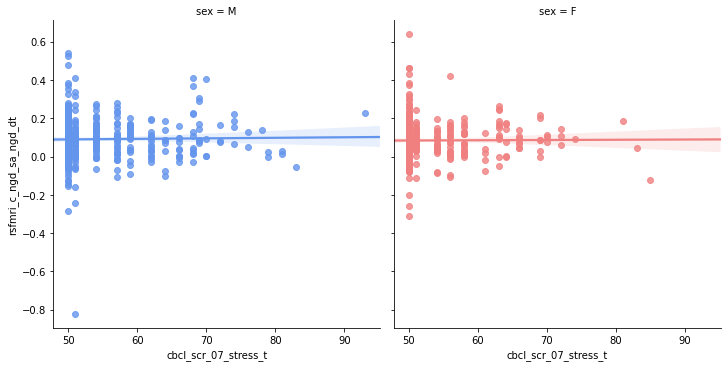

In [78]:
# Make a custom palette with gendered colors
# Note: this is equivalent to {"M": "#6495ED", "F": "#F08080"}
pal = dict(M="#6495ED", F="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x='cbcl_scr_07_stress_t', y='rsfmri_c_ngd_sa_ngd_dt', col="sex", hue="sex", data=subset_df,
               palette=pal, y_jitter=.02, logistic=False, truncate=False)

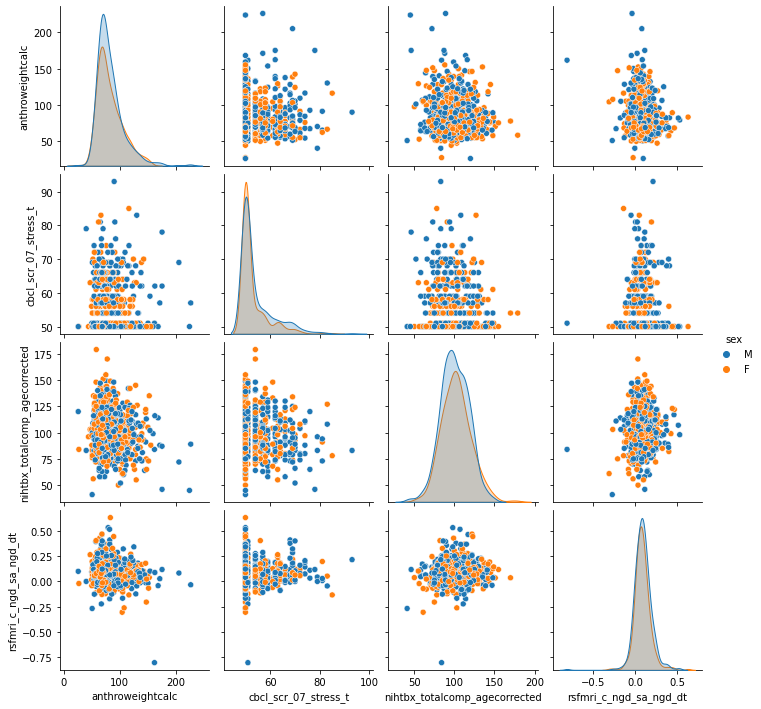

In [79]:
sns.pairplot(subset_df, hue="sex", vars=["anthroweightcalc", 'cbcl_scr_07_stress_t', 'nihtbx_totalcomp_agecorrected', "rsfmri_c_ngd_sa_ngd_dt"]);

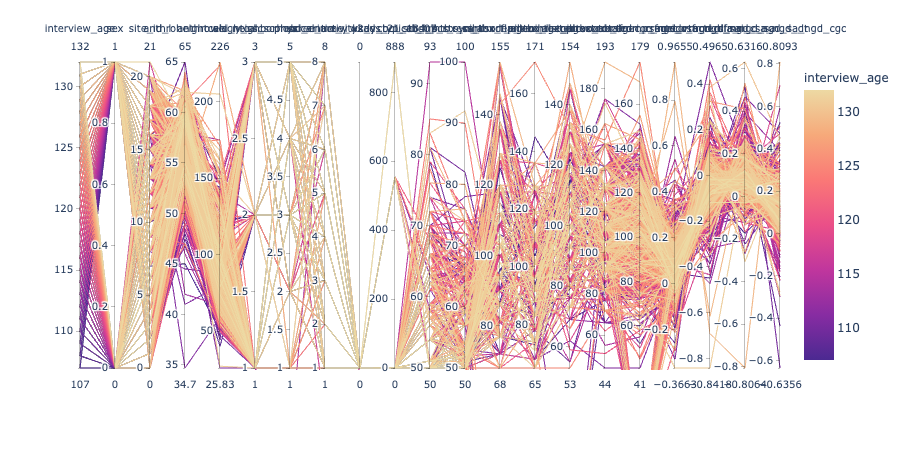

In [80]:
# Create an interactive parallel coordinate plot
subset_df_numerical = subset_df.copy()
subset_df_numerical.sex = subset_df.sex.astype("category").cat.codes
subset_df_numerical.site_id_l = subset_df.site_id_l.astype("category").cat.codes
fig = px.parallel_coordinates(subset_df_numerical, color="interview_age", 
                              dimensions=["interview_age", "sex"] + data_elements_of_interest,
                              color_continuous_scale=px.colors.sequential.Agsunset,)
                              #color_continuous_midpoint=2)
fig.show()

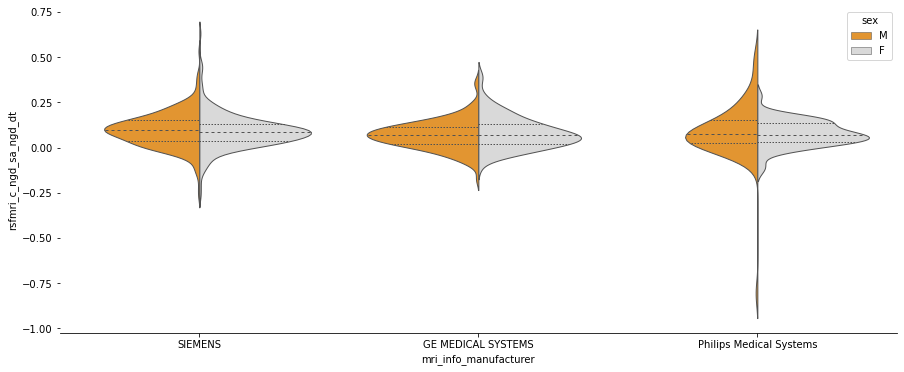

In [81]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=subset_df, x="mri_info_manufacturer", y="rsfmri_c_ngd_sa_ngd_dt", hue="sex",
               split=True, inner="quart", linewidth=1,
               palette={"M": "#FF9914", "F": ".85"})
sns.despine(left=True)